In [15]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
pd.set_option("display.max_columns", None)


In [2]:
sp100_url = "https://en.wikipedia.org/wiki/S%26P_100"
sp100_table = pd.read_html(sp100_url)
tickers = sp100_table[2]['Symbol'].tolist()

#Time range here
start_date = "2023-12-31"
end_date = "2024-12-31"

In [3]:
sp100_data = {}
for ticker in tickers:
    try:
        stock = yf.Ticker(ticker)
        hist = stock.history(start=start_date, end=end_date, interval="1d")
        sp100_data[ticker] = hist
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

$BRK.B: possibly delisted; no timezone found


In [4]:
combined_data = pd.concat(sp100_data, names=["Ticker", "Date"])
combined_data.to_csv("sp100_daily_combined.csv")

C:\Users\hughp\AppData\Local\Temp\ipykernel_14800\2558842558.py:1: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  combined_data = pd.concat(sp100_data, names=["Ticker", "Date"])


In [5]:
df = pd.read_csv("sp100_daily_combined.csv")
df.head()

,Ticker,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Adj Close
0,AAPL,2024-01-02 00:00:00-05:00,186.033057,187.315366,182.792518,184.532074,82488700.0,0.0,0.0,NaN
1,AAPL,2024-01-03 00:00:00-05:00,183.120556,184.770652,182.335262,183.150375,58414500.0,0.0,0.0,NaN
2,AAPL,2024-01-04 00:00:00-05:00,181.062914,181.997307,179.800504,180.824356,71983600.0,0.0,0.0,NaN
3,AAPL,2024-01-05 00:00:00-05:00,180.903888,181.669281,179.094742,180.098709,62303300.0,0.0,0.0,NaN
4,AAPL,2024-01-08 00:00:00-05:00,181.003268,184.492330,180.416793,184.452560,59144500.0,0.0,0.0,NaN


In [6]:
adj_close = combined_data["Close"].unstack(level=0)  # Pivot by ticker
adj_close["SP100_EqualWeight"] = adj_close.mean(axis=1)

In [7]:
print(adj_close) # closes of each stock per day
#Our main data for this project *muscle emoji*

Ticker                           AAPL        ABBV         ABT         ACN  \
Date                                                                        
2024-01-02 00:00:00-05:00  184.532074  152.743393  107.138474  341.431335   
2024-01-03 00:00:00-05:00  183.150375  153.355057  106.816628  332.573730   
2024-01-04 00:00:00-05:00  180.824356  154.310776  108.240593  331.756897   
2024-01-05 00:00:00-05:00  180.098709  154.960678  108.065033  331.294312   
2024-01-08 00:00:00-05:00  184.452560  154.282104  109.625542  334.965332   
...                               ...         ...         ...         ...   
2024-12-23 00:00:00-05:00  254.989655  176.723465  113.713264  358.769989   
2024-12-24 00:00:00-05:00  257.916443  178.318420  114.160919  361.630005   
2024-12-26 00:00:00-05:00  258.735504  177.525894  114.668251  360.429993   
2024-12-27 00:00:00-05:00  255.309296  176.347015  114.389717  356.179993   
2024-12-30 00:00:00-05:00  251.923019  174.553925  112.211151  352.489990   

In [21]:
DailyValue = pd.DataFrame(adj_close, dtype=np.float32)
DailyValue = DailyValue.fillna(0)
DailyValue.head()

Ticker,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMD,AMGN,AMT,AMZN,AVGO,AXP,BA,BAC,BK,BKNG,BLK,BMY,C,CAT,CHTR,CL,CMCSA,COF,COP,COST,CRM,CSCO,CVS,CVX,DE,DHR,DIS,DUK,EMR,FDX,GD,GE,GILD,GM,GOOG,GOOGL,GS,HD,HON,IBM,INTC,INTU,ISRG,JNJ,JPM,KO,LIN,LLY,LMT,LOW,MA,MCD,MDLZ,MDT,MET,META,MMM,MO,MRK,MS,MSFT,NEE,NFLX,NKE,NOW,NVDA,ORCL,PEP,PFE,PG,PLTR,PM,PYPL,QCOM,RTX,SBUX,SCHW,SO,SPG,T,TGT,TMO,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,VZ,WFC,WMT,XOM,SP100_EqualWeight
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-01-02 00:00:00-05:00,184.532074,152.743393,107.138474,341.431335,580.070007,67.074501,138.580002,286.354218,211.642944,149.929993,106.772415,185.645401,251.759995,32.851425,50.620995,3442.918213,777.391357,49.672390,50.784550,287.037109,391.510010,78.533020,42.322159,129.580353,113.465706,646.158203,254.707367,48.586620,76.629860,141.734131,394.961151,233.425598,89.895103,93.111061,93.708572,245.823059,252.138565,99.674431,79.414551,35.588531,138.902084,137.512558,377.245605,334.705780,203.540924,154.833939,47.168282,599.175232,330.980011,153.829590,167.203140,57.621922,403.299316,587.347778,441.226593,213.632538,418.846344,288.347137,71.889870,79.474312,64.898201,344.665588,88.455696,37.613506,109.287132,90.001060,367.380585,59.338909,468.500000,104.225563,687.520020,48.149918,102.550766,166.076340,27.561718,144.247437,16.58,90.202316,61.459999,136.780594,82.845650,90.796104,67.866081,67.760330,134.383835,16.040480,137.801804,542.214966,159.024643,248.419998,163.363083,528.766113,236.856400,148.922592,41.968719,256.474762,35.816395,47.823627,52.324093,98.106003,225.757721
2024-01-03 00:00:00-05:00,183.150375,153.355057,106.816628,332.573730,571.789978,66.850403,135.320007,289.531769,207.657898,148.470001,104.136002,183.683563,243.910004,32.492870,50.060471,3372.398926,761.703796,49.239315,51.359032,278.790070,386.670013,77.725494,41.973274,128.216980,115.723648,640.239380,250.441177,48.964691,76.658295,144.436478,387.513275,229.468735,90.826660,94.034470,92.535744,241.340073,250.130035,98.178711,79.643539,34.818516,139.698334,138.259003,370.920959,328.090790,199.187653,153.491745,46.428196,586.651062,322.130005,154.791199,166.474380,57.756775,402.442657,612.638855,444.128632,207.398941,415.748779,285.774689,71.344666,79.819695,64.676575,342.854126,86.678558,37.450672,110.763733,88.093689,367.113159,59.743698,470.260010,101.770317,675.299988,47.551144,100.973969,166.114777,27.561718,143.374603,16.09,90.070175,58.630001,134.215286,83.224800,90.369606,65.852692,69.089714,131.621582,16.021881,133.535828,526.939514,159.191620,238.449997,160.930908,531.403381,235.173111,148.170181,40.860004,255.592987,36.074329,47.193474,52.327377,98.930252,223.262451
2024-01-04 00:00:00-05:00,180.824356,154.310776,108.240593,331.756897,567.049988,66.869888,136.009995,291.919739,208.402695,144.570007,103.194572,185.087982,244.940002,32.754520,50.263416,3382.953857,763.452209,49.563129,51.483505,280.555237,375.750000,78.163307,41.314259,127.285149,112.394646,643.874023,249.844513,48.547848,76.307610,142.852997,386.567535,231.268204,89.746445,93.758400,92.946236,239.049850,249.779022,98.653549,80.597580,35.035706,137.389252,135.741028,372.047943,328.410889,199.548004,154.220352,46.250576,582.363831,323.269989,154.464233,167.579147,57.564125,402.324524,609.465027,442.919434,206.373032,416.741577,283.202240,71.344666,80.520035,65.033096,345.491669,86.984131,37.559227,112.925537,88.323730,364.478180,59.560574,474.670013,100.068283,671.869995,47.979984,101.102089,164.693268,26.968395,144.160110,16.25,90.296722,58.450001,132.820465,83.030365,90.679794,65.695549,68.582832,131.781296,15.947490,135.057312,535.449097,159.407684,237.929993,158.739990,534.726807,234.550385,147.652908,41.299667,257.207886,36.267780,47.775150,51.821510,98.067665,223.210373
2024-01-05 00:00:00-05:00,180.098709,154.960678,108.065033,331.294312,564.599976,67.240143,138.580002,291.756042,207.261322,145.240005,103.221138,186.986923,249.000000,33.3650

In [22]:
DailyValue.to_csv("sp100_daily_value.csv")

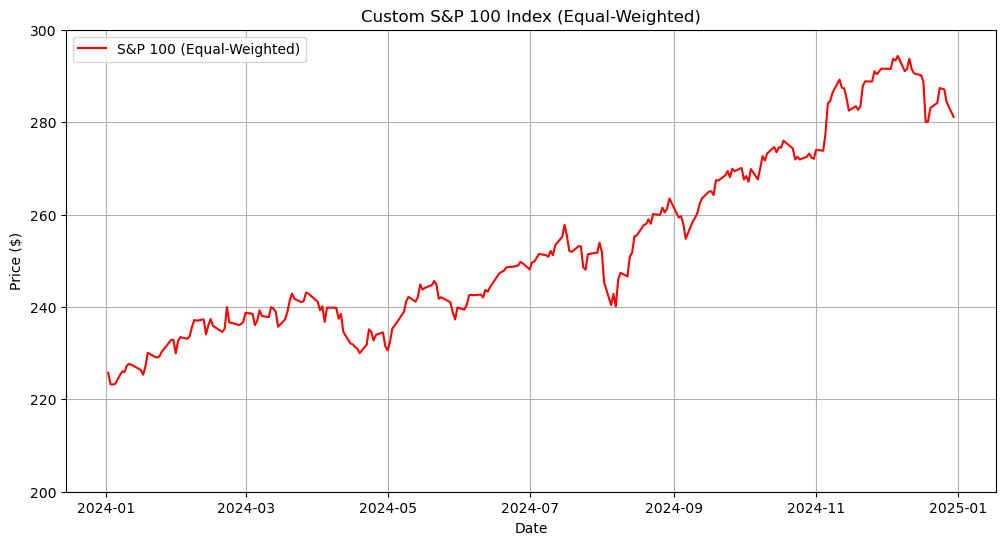

In [8]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=adj_close, x=adj_close.index, y="SP100_EqualWeight", 
             label="S&P 100 (Equal-Weighted)", color="red")
plt.title("Custom S&P 100 Index (Equal-Weighted)")
plt.ylabel("Price ($)")
plt.grid(True)
plt.ylim(200,300)
plt.show()

In [9]:
daily_returns = adj_close.pct_change() * 100

In [10]:
print(daily_returns)

Ticker                         AAPL      ABBV       ABT       ACN      ADBE  \
Date                                                                          
2024-01-02 00:00:00-05:00       NaN       NaN       NaN       NaN       NaN   
2024-01-03 00:00:00-05:00 -0.748758  0.400452 -0.300402 -2.594257 -1.427419   
2024-01-04 00:00:00-05:00 -1.270005  0.623207  1.333093 -0.245610 -0.828974   
2024-01-05 00:00:00-05:00 -0.401299  0.421165 -0.162194 -0.139435 -0.432063   
2024-01-08 00:00:00-05:00  2.417481 -0.437901  1.444046  1.108084  2.825011   
...                             ...       ...       ...       ...       ...   
2024-12-23 00:00:00-05:00  0.306496  1.600403  0.070027 -2.074407 -0.096165   
2024-12-24 00:00:00-05:00  1.147807  0.902515  0.393670  0.797173  0.268615   
2024-12-26 00:00:00-05:00  0.317568 -0.444444  0.444401 -0.331834  0.495602   
2024-12-27 00:00:00-05:00 -1.324213 -0.664060 -0.242904 -1.179147 -0.817485   
2024-12-30 00:00:00-05:00 -1.326343 -1.016797 -1.904

In [20]:
DailyChange = pd.DataFrame(daily_returns, dtype=np.float32)
DailyChange = DailyChange.fillna(0)
DailyChange.head()

Ticker,AAPL,ABBV,ABT,ACN,ADBE,AIG,AMD,AMGN,AMT,AMZN,AVGO,AXP,BA,BAC,BK,BKNG,BLK,BMY,C,CAT,CHTR,CL,CMCSA,COF,COP,COST,CRM,CSCO,CVS,CVX,DE,DHR,DIS,DUK,EMR,FDX,GD,GE,GILD,GM,GOOG,GOOGL,GS,HD,HON,IBM,INTC,INTU,ISRG,JNJ,JPM,KO,LIN,LLY,LMT,LOW,MA,MCD,MDLZ,MDT,MET,META,MMM,MO,MRK,MS,MSFT,NEE,NFLX,NKE,NOW,NVDA,ORCL,PEP,PFE,PG,PLTR,PM,PYPL,QCOM,RTX,SBUX,SCHW,SO,SPG,T,TGT,TMO,TMUS,TSLA,TXN,UNH,UNP,UPS,USB,V,VZ,WFC,WMT,XOM,SP100_EqualWeight
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2024-01-02 00:00:00-05:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-01-03 00:00:00-05:00,-0.748758,0.400452,-0.300402,-2.594257,-1.427419,-0.334103,-2.352428,1.109658,-1.882910,-0.973782,-2.469190,-1.056766,-3.118045,-1.091444,-1.107296,-2.048242,-2.017975,-0.871863,1.131214,-2.873162,-1.236238,-1.028262,-0.824354,-1.052145,1.989978,-0.916002,-1.674938,0.778138,0.037107,1.906631,-1.885724,-1.695128,1.036271,0.991728,-1.251570,-1.823664,-0.796598,-1.500605,0.288346,-2.163662,0.573245,0.542819,-1.676533,-1.976360,-2.138770,-0.866860,-1.569032,-2.090235,-2.673879,0.625113,-0.435853,0.234031,-0.212413,4.305980,0.657721,-2.917906,-0.739547,-0.892136,-0.758388,0.434584,-0.341498,-0.525571,-2.009071,-0.432914,1.351120,-2.119277,-0.072793,0.682164,0.375669,-2.355704,-1.777407,-1.243562,-1.537578,0.023144,0.000000,-0.605094,-2.955367,-0.146494,-4.604618,-1.875491,0.457659,-0.469732,-2.966710,1.961891,-2.055495,-0.115948,-3.095733,-2.817232,0.105001,-4.013365,-1.488815,0.498759,-0.710679,-0.505236,-2.641765,-0.343806,0.720158,-1.317662,0.006277,0.840162,-1.105288
2024-01-04 00:00:00-05:00,-1.270005,0.623207,1.333093,-0.245610,-0.828974,0.029148,0.509893,0.824770,0.358665,-2.626789,-0.904038,0.764586,0.422286,0.805254,0.405401,0.312980,0.229540,0.657634,0.242360,0.633153,-2.824117,0.563281,-1.570084,-0.726761,-2.876683,0.567701,-0.238245,-0.851314,-0.457465,-1.096316,-0.244054,0.784189,-1.189315,-0.293583,0.443604,-0.948961,-0.140332,0.483647,1.197888,0.623777,-1.652906,-1.821201,0.303834,0.097564,0.180911,0.474688,-0.382569,-0.730798,0.353889,-0.211230,0.663626,-0.333554,-0.029354,-0.518059,-0.272263,-0.494655,0.238798,-0.900167,0.000000,0.877403,0.551238,0.769290,0.352535,0.289861,1.951726,0.261133,-0.717757,-0.306517,0.937780,-1.672427,-0.507921,0.901851,0.126885,-0.855739,-2.152706,0.547871,0.994406,0.251523,-0.307011,-1.039242,-0.233626,0.343244,-0.238628,-0.733657,0.121343,-0.464311,1.139383,1.614907,0.135726,-0.218077,-1.361403,0.625405,-0.264795,-0.349107,1.076023,0.631824,0.536256,1.232536,-0.966735,-0.871914,-0.023330
2024-01-05 00:00:00-05:00,-0.401299,0.421165,-0.162194,-0.139435,-0.432063,0.553694,1.889572,-0.056076,-0.547677,0.463442,0.025743,1.025967,1.657548,1.863901,0.730633,-0.345042,-0.396981,0.365106,1.041487,0.989151,-0.944774,-0.448091,0.961766,2.042081,0.042921,1.181460,-0.047771,0.019974,1.130298,-0.172580,0.909802,-1.001624,0.375449,0.050777,0.389070,0.619678,-0.890002,1.307561,-1.384947,1.408845,-0.470872,-0.483907,0.911349,1.284734,-0.668618,-1.056814,0.042666,0.374901,-0.238188,0.311272,0.501718,-0.150596,0.129716,0.659057,-0

In [23]:
DailyChange.to_csv("sp100_daily_change.csv")

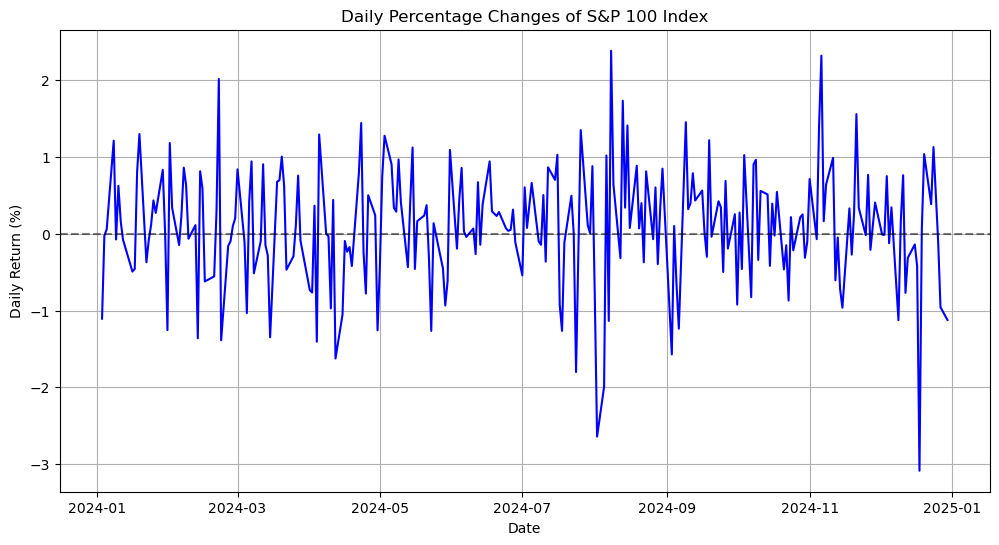

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(data = daily_returns,x=daily_returns.index, y="SP100_EqualWeight", color="blue", )
plt.axhline(0, color="black", linestyle="--", alpha=0.5)  #0
plt.title("Daily Percentage Changes of S&P 100 Index")
plt.ylabel("Daily Return (%)")
plt.xlabel("Date")
plt.grid(True)
plt.show()